# Indian Crime Report

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [63]:
df= pd.read_csv("D:/Downloads/crime_dataset_india.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [4]:
df.head(5)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [89]:
#Convert String DataType into Date-Time Data type
df['Time of Occurrence']= pd.to_datetime(df['Time of Occurrence'])
df['Dateonly']=df['Time of Occurrence'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Report Number       40160 non-null  int64         
 1   Date Reported       40160 non-null  object        
 2   Date of Occurrence  40160 non-null  object        
 3   Time of Occurrence  40160 non-null  datetime64[ns]
 4   City                40160 non-null  object        
 5   Crime Code          40160 non-null  int64         
 6   Crime Description   40160 non-null  object        
 7   Victim Age          40160 non-null  int64         
 8   Victim Gender       40160 non-null  object        
 9   Weapon Used         34370 non-null  object        
 10  Crime Domain        40160 non-null  object        
 11  Police Deployed     40160 non-null  int64         
 12  Case Closed         40160 non-null  object        
 13  Date Case Closed    20062 non-null  object    

In [67]:
df['Age-group']= pd.cut(df['Victim Age'],bins=3,labels=('Young',"Middle Age","Old"))

In [71]:
df['Crime-Date']=df['Time of Occurrence'].dt.date
df['Year']=df['Time of Occurrence'].dt.year

In [73]:
df.head(10)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Dateonly,Age-group,Crime-Date,Year
0,1,02-01-2020 00:00,01-01-2020 00:00,2020-01-01 01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020-01-01,Young,2020-01-01,2020
1,2,01-01-2020 19:00,01-01-2020 01:00,2020-01-01 06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020-01-01,Middle Age,2020-01-01,2020
2,3,02-01-2020 05:00,01-01-2020 02:00,2020-01-01 14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020-01-01,Middle Age,2020-01-01,2020
3,4,01-01-2020 05:00,01-01-2020 03:00,2020-01-01 14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020-01-01,Middle Age,2020-01-01,2020
4,5,01-01-2020 21:00,01-01-2020 04:00,2020-01-01 16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020-01-01,Young,2020-01-01,2020
5,6,02-01-2020 03:00,01-01-2020 05:00,2020-01-01 17:09:00,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,30-03-2020 03:00,2020-01-01,Young,2020-01-01,2020
6,7,01-01-2020 16:00,01-01-2020 06:00,2020-01-01 14:08:00,Chennai,172,VEHICLE - STOLEN,64,F,Knife,Violent Crime,13,Yes,24-03-2020 16:00,2020-01-01,Old,2020-01-01,2020
7,8,02-01-2020 10:00,01-01-2020 07:00,2020-01-02 06:33:00,Chennai,169,COUNTERFEITING,78,X,Knife,Other Crime,8,No,NaN,2020-01-02,Old,2020-01-02,2020
8,9,04-01-2020 03:00,01-01-2020 08:00,2020-01-02 06:34:00,Mumbai,338,EXTORTION,41,X,Blunt Object,Other Crime,1,No,NaN,2020-01-02,Middle Age,2020-01-02,2020
9,10,03-01-2020 07:00,01-01-2020 09:00,2020-01-01 17:50:00,Chennai,497,PUBLIC INTOXICATION,29,M,Knife,Other Crime,4,No,NaN,2020-01-01,Young,2020-01-01,2020


In [9]:
df.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
Dateonly                  0
Age-group                 0
Crime-Date                0
Year                      0
dtype: int64

In [ ]:
df.isnull().sum()

**Crime by Age-Group**

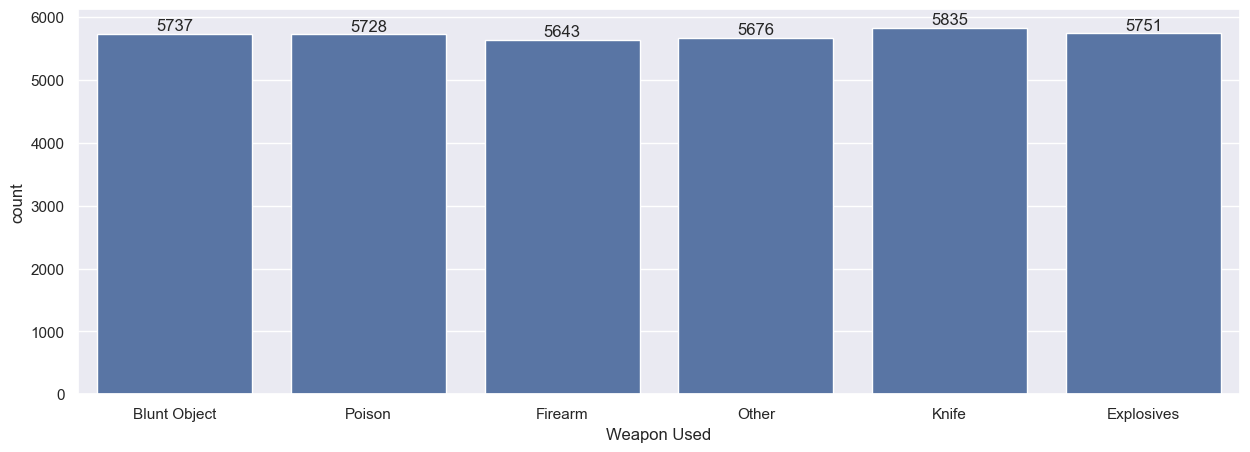

In [13]:
ax=sns.countplot(x=df['Weapon Used'])

for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize':(15,5)})
plt.show()


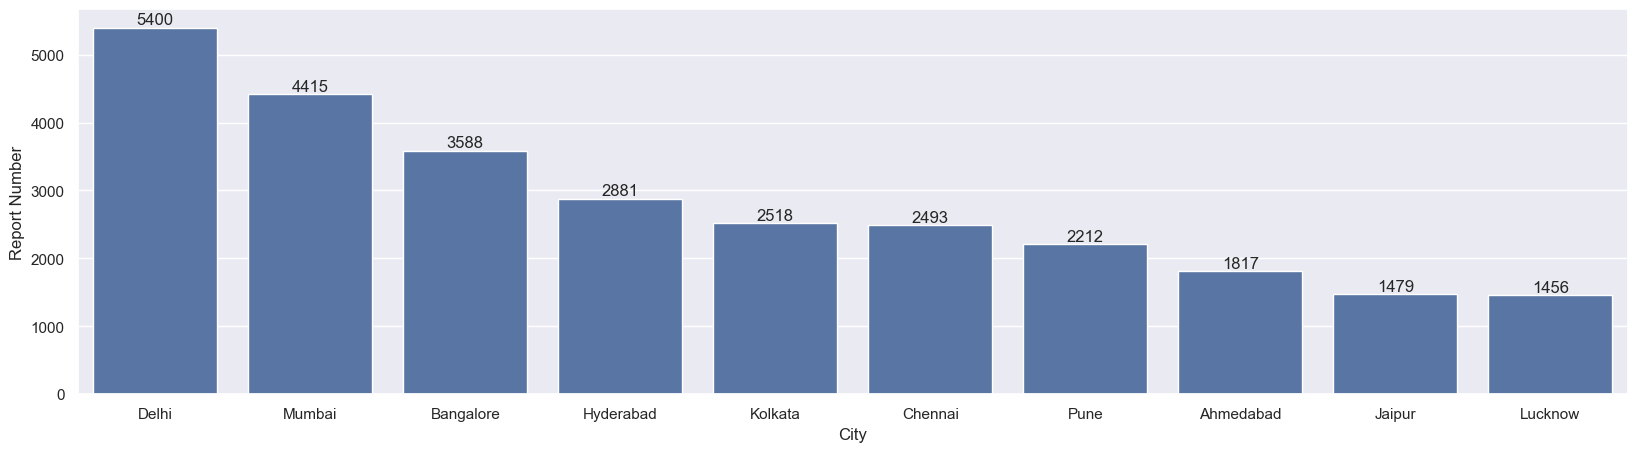

In [17]:
crime= df.groupby(df['City'],as_index=False)['Report Number'].count().sort_values(by="Report Number", ascending=False).head(10)
ax= sns.barplot(x="City",y="Report Number", data=crime)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(20,5)})


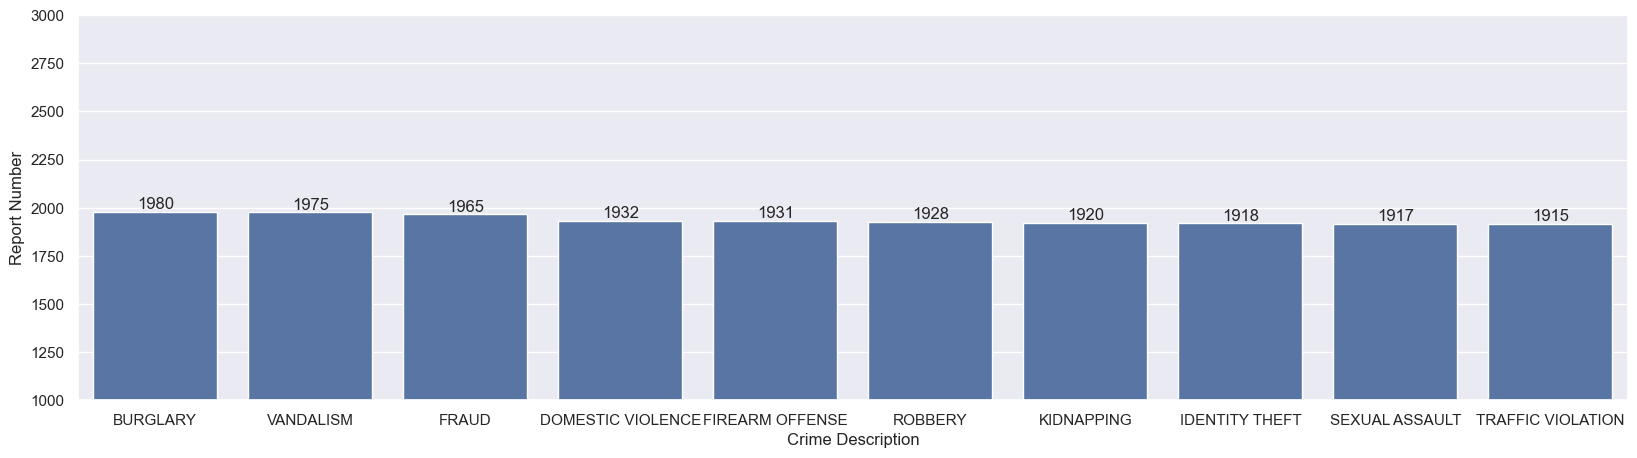

In [37]:
crime= df.groupby(df['Crime Description'],as_index=False)['Report Number'].count().sort_values(by="Report Number", ascending=False).head(10)

ax= sns.barplot(x="Crime Description",y="Report Number", data=crime )
plt.ylim(1000,3000)
for bars in ax.containers:
    ax.bar_label(bars)
    
sns.set(rc={'figure.figsize':(20,5)})


**Crime Based On Daily**

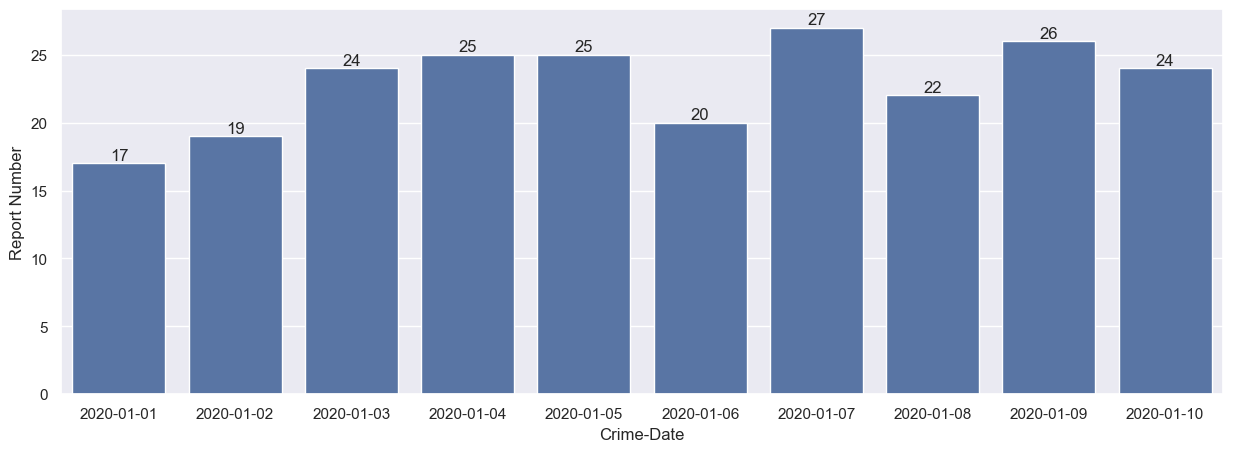

In [113]:
crime= df.groupby(df['Crime-Date'],as_index=False)['Report Number'].count().head(10)

ax= sns.barplot(x="Crime-Date", y="Report Number",data= crime)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


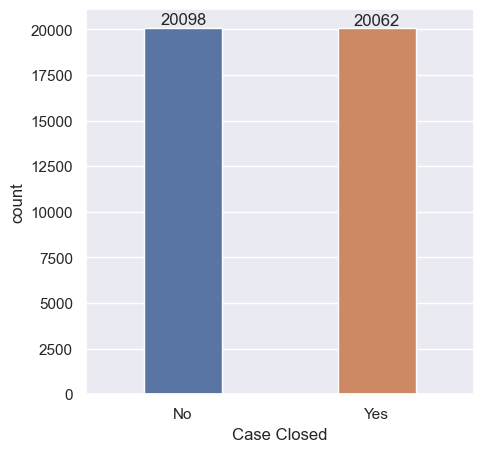

In [133]:
ax=sns.countplot(x=df['Case Closed'],hue=df["Case Closed"],width=0.4)

for bars in ax.containers:
    ax.bar_label(bars)

sns.set(rc={'figure.figsize':(5,5)})
plt.show()